In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [90]:
#import all data and divide into variables

nanosurface_rough_data = pd.read_excel('2SurfaceNanoroughnessParameters.xlsx', header = [0,1], 
                                    index_col = 0, skip_footer = 39) #end of spreadsheet contains averages and SEMs, I want these separate
nanosurface_rough_mean = pd.read_excel('2SurfaceNanoroughnessParameters.xlsx', header = [0,1],  #the averages only
                                  index_col = 0, skiprows = np.arange(0,139), skip_footer = 26)
nanosurface_rough_SEM = pd.read_excel('2SurfaceNanoroughnessParameters.xlsx', header = [0,1], #standard error of mean
                                    index_col = 0, skiprows = np.arange(0,152), skip_footer = 13)

nanosurface_stiffness_data = pd.read_excel('3SurfaceNanostiffnessParameters.xlsx', header = [0,1],
                                         index_col = 0, skip_footer = 39)
nanosurface_stiffness_mean = pd.read_excel('3SurfaceNanostiffnessParameters.xlsx', header = [0,1],
                                        index_col = 0,  skiprows =np.arange(0,101), skip_footer = 26)
nanosurface_stiffness_SEM = pd.read_excel('3SurfaceNanostiffnessParameters.xlsx', header = [0,1],
                                        index_col = 0, skiprows = np.arange(0,114), skip_footer = 13)

forces_data = pd.read_excel('8StaticMechanicalParameters.xlsx', header = [0,1],
                           index_col = 0, skip_footer = 104)
forces_mean = pd.read_excel('8StaticMechanicalParameters.xlsx', header = [0,1],
                           index_col = 0, skiprows = 144, skip_footer = 41)
forces_SEM = pd.read_excel('8StaticMechanicalParameters.xlsx', header = [0,1],
                         index_col = 0, skiprows = 162, skip_footer = 23)

nanosurface_rough_data

,Average Value,Minimum,Maximum,Median,Ra,Rms,Skew,Kurtosis,Surface Area (10^-15),Projected Area (10^-15),Inclination (theta),Inclination (phi)
,nm,nm,nm,nm,nm,nm,-,-,m^2,m^2,deg,deg
Aglaoctenus lagotis-1,4604.210,4592.040,4613.760,4604.970,4.060,4.760,-0.2290,-0.87600,63.388,62.5,0.0,72.9
Aglaoctenus lagotis-2,4687.420,4679.440,4692.910,4688.010,2.540,3.040,-0.5610,-0.58200,62.965,62.5,0.2,87.0
Aglaoctenus lagotis-3,4671.060,4663.650,4676.580,4671.440,2.570,3.010,-0.3380,-0.92800,62.983,62.5,0.1,23.8
Aglaoctenus lagotis-4,4682.700,4674.260,4687.050,4683.250,2.350,2.800,-0.5920,-0.62800,62.923,62.5,0.2,-165.3
Aglaoctenus lagotis-5,4603.600,4594.890,4607.730,4604.080,2.250,2.710,-0.6420,-0.49200,62.905,62.5,0.3,-152.2
Aglaoctenus lagotis-6,4665.775,4662.282,4668.134,4665.907,0.852,1.039,-0.5110,-0.29500,62.605,62.5,0.2,86.0
Aglaoctenus lagotis-7,4694.390,4687.280,4698.650,4694.700,1.690,2.050,-0.5620,-0.22700,62.766,62.5,0.2,-171.7
Aglaoctenus lagotis-8,4637.410,4629.800,4642.300,4637.950,2.300,2.740,-0.5040,-0.71300,62.853,62.5,0.4,-164.4
Aglaoctenus lagotis-9,4657.340,4650.350,4660.590,4657.800,1.430,1.750,-0.7810,-0.06560,62.728,62.5,0.4,-23.0


In [85]:
spiders = np.array(['Aglaoctenus lagotis', 'Argiope argentata', 'Argiope lobata', 'Avicularia juruensis', 'Avicularia (sp)',
                   'Gasteracantha cancriformis', 'Nephila clavipes', 'Nephilengys cruentata', 'Parawixia bistriata'])

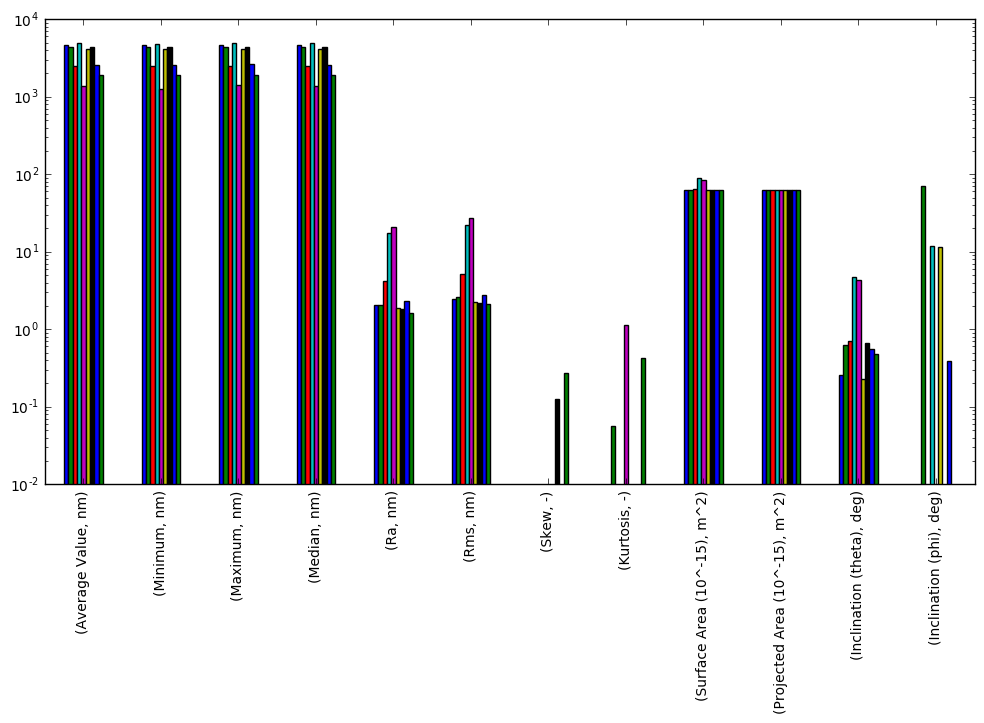

In [99]:
#plot everything


nanosurf = nanosurface_rough_mean.transpose()
x = nanosurf.plot(kind = 'bar', logy = True, legend = False, yerr = nanosurface_rough_SEM, figsize = (12,6))

#outline
bar graphs of everything
pca